# 3 Виконання

## 3.1 Створення моделі TD-IDF.

### Для початку імпортуємо модулі та зчитаємо файл.

In [81]:
import numpy as np
import pandas as pd
import nltk
import re
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


*Зчитування файлу*

### Видалимо колонки 'filename' та 'title', щоб класифікувати модуль лише за категоріями.

In [82]:
df.drop(['filename', 'title'], axis=1, inplace=True)
df

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...
...,...,...
2220,tech,BT is introducing two initiatives to help bea...
2221,tech,Computer users across the world continue to i...
2222,tech,A new European directive could put software w...
2223,tech,The man making sure US computer networks are ...


*Видалення колонок 'filename' та 'title'*

### Перетворимо категоріальні змінні у числові за допомогою класу LabelEncoder з модуля sklearn.preprocessing.

In [83]:
from sklearn.preprocessing import LabelEncoder
df['category_labeled'] = LabelEncoder().fit_transform(df.category)
df

,category,content,category_labeled
0,business,Quarterly profits at US media giant TimeWarne...,0
1,business,The dollar has hit its highest level against ...,0
2,business,The owners of embattled Russian oil giant Yuk...,0
3,business,British Airways has blamed high fuel prices f...,0
4,business,Shares in UK drinks and food firm Allied Dome...,0
...,...,...,...
2220,tech,BT is introducing two initiatives to help bea...,4
2221,tech,Computer users across the world continue to i...,4
2222,tech,A new European directive could put software w...,4
2223,tech,The man making sure US computer networks are ...,4


*Перетворення категоріальних змінних в числові*

### Видалимо порожні документи, якщо вони є.

In [84]:
df = df[~(df.content.str.strip() == '')]
df

,category,content,category_labeled
0,business,Quarterly profits at US media giant TimeWarne...,0
1,business,The dollar has hit its highest level against ...,0
2,business,The owners of embattled Russian oil giant Yuk...,0
3,business,British Airways has blamed high fuel prices f...,0
4,business,Shares in UK drinks and food firm Allied Dome...,0
...,...,...,...
2220,tech,BT is introducing two initiatives to help bea...,4
2221,tech,Computer users across the world continue to i...,4
2222,tech,A new European directive could put software w...,4
2223,tech,The man making sure US computer networks are ...,4


*Видалення порожніх документів*

### Визначимо стоп-слова англійської мови.

In [85]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

*Стоп-слова*

### Визначимо функцію, що виконує попередню обробку документу. Застосуємо декоратор np.vectorize для того, щоб функція могла працювати з корпусами.

In [86]:
@np.vectorize
def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

df['clean_content'] = preproc_doc(df.content)
df

,category,content,category_labeled,clean_content
0,business,Quarterly profits at US media giant TimeWarne...,0,quarterly profits us media giant timewarner ju...
1,business,The dollar has hit its highest level against ...,0,dollar hit highest level euro almost three mon...
2,business,The owners of embattled Russian oil giant Yuk...,0,owners embattled russian oil giant yukos ask b...
3,business,British Airways has blamed high fuel prices f...,0,british airways blamed high fuel prices drop p...
4,business,Shares in UK drinks and food firm Allied Dome...,0,shares uk drinks food firm allied domecq risen...
...,...,...,...,...
2220,tech,BT is introducing two initiatives to help bea...,4,bt introducing two initiatives help beat rogue...
2221,tech,Computer users across the world continue to i...,4,computer users across world continue ignore se...
2222,tech,A new European directive could put software w...,4,new european directive could put software writ...
2223,tech,The man making sure US computer networks are ...,4,man making sure us computer networks safe secu...


*Обробка документів*

### У результаті попередньої обробки деякі документи могли стати порожніми. Тому потрібно це перевірити.

In [87]:
df.replace(r'^(\s?)+$', np.nan, regex=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          2225 non-null   object
 1   content           2225 non-null   object
 2   category_labeled  2225 non-null   int64 
 3   clean_content     2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.9+ KB


*Перевірка на присутність пустих значень*

### Видалимо пусті значення.

In [88]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          2225 non-null   object
 1   content           2225 non-null   object
 2   category_labeled  2225 non-null   int64 
 3   clean_content     2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


*Видалення пустих значень*

### Розділимо дані на навчальні та тестові, отримаємо чотири масиви: документи для навчання, документи для тестування, мітки для навчання, мітки для тестування.

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df.clean_content, df.category_labeled, test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((1557,), (668,))

*Розділення даних на навчальні та тестові*

### Використаємо TF-IDF модель для представлення тексту у векторному вигляді.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
x_train = tv.fit_transform(x_train)
x_test = tv.transform(x_test)

*TF-IDF модель*

## 3.2 KNN

### Оберемо декілька методів класифікації: KNN, Logistic Regression, SVC, Random Forest, Naive Bayes, Gridient Boosting.

### Зберігатимемо результати тестування моделей у списку results.

In [91]:
results = []

*Список результатів*

### Для виконання роботи методу KNN імпортуємо sklearn.neighbors.KNeighborsClassifier та sklearn.model_selection.GridSearchCV. 

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

*Імпортування модулів*

### Визначимо, які варіанти параметрів найкраще вирішують дану задачу.

In [93]:
classificator = KNeighborsClassifier()
params = {'n_neighbors': range(1, 40)}
grid_search = GridSearchCV(classificator, params, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
knn = grid_search.best_estimator_
knn

Fitting 10 folds for each of 39 candidates, totalling 390 fits


KNeighborsClassifier(n_neighbors=22)

*Визначення найкращого параметра*

### Натренуємо модель з найкращим параметром.

In [94]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

*Тренування моделі K-Nearest Neighbors*

### Визначимо точність моделі на тренувальних та тестових даних.

In [95]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'knn', 'score': train_score, 'type': 'train'})
results.append({'method': 'knn', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.95954
Test accuracy: 0.95659


*Точність моделі K-Nearest Neighbors*

## 3.3 Logistic Regression

### Для виконання роботи методу Logistic Regression імпортуємо sklearn.linear_model.LogisticRegression. Визначимо найкращі параметри моделі, передавши в неї параметри регуляризації.

In [96]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
c = np.logspace(-4, 4, 60)
penalty = ['l1', 'l2']
params = dict(C=c, penalty=penalty)
log_reg = GridSearchCV(logisticRegr, params, cv=10, verbose=1)
log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.36644835e-04, 1.86718109e-04, 2.55140652e-04,
       3.48636523e-04, 4.76393801e-04, 6.50967523e-04, 8.89513497e-04,
       1.21547425e-03, 1.66088278e-03, 2.26951054e-03, 3.10116893e-03,
       4.23758716e-03, 5.79044398e-03, 7.91234262e-03, 1.08118075e-02,
       1.47737765e-02, 2.01876025e-02, 2.75853...
       7.60949669e+00, 1.03979842e+01, 1.42083083e+01, 1.94149195e+01,
       2.65294846e+01, 3.62511705e+01, 4.95353521e+01, 6.76875001e+01,
       9.24914728e+01, 1.26384820e+02, 1.72698329e+02, 2.35983347e+02,
       3.22459055e+02, 4.40623643e+02, 6.02089449e+02, 8.22724134e+02,
       1.12421004e+03, 1.53617495e+03, 2.09910372e+03, 2.86831681e+03,
       3.91940677e+03, 5.35566692e+03, 7.31824222e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

*Тренування моделі Logistic Regression*

### Визначимо точність моделі на тренувальних та тестових даних.

In [97]:
train_score = round(log_reg.score(x_train, y_train), 5)
test_score = round(log_reg.score(x_test, y_test), 5)
results.append({'method': 'logress', 'score': train_score, 'type': 'train'})
results.append({'method': 'logress', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.97754


*Точність моделі Logistic Regression*

## 3.4 Random Forest

### Для виконання роботи методу Random Forest імпортуємо sklearn.ensemble.RandomForestClassifier. Визначимо найкращі параметри для моделі. У випадку Random Forest параметри включають кількість дерев рішень та кількість характеристик, які враховуються кожним деревом під час поділу вузла і використовуються для поділу кожного вузла, отриманого під час навчання. Імпортуємо sklearn.model_selection.RandomizedSearchCV.

In [98]:
from sklearn.ensemble import RandomForestClassifier
# Кількість дерев
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 60)]
params = {'n_estimators': n_estimators}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=5)
rf_random.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'n_estimators': [10, 14, 19, 24, 29, 34, 39, 44, 49,
                                          54, 59, 64, 68, 73, 78, 83, 88, 93,
                                          98, 103, 108, 113, 118, 123, 127, 132,
                                          137, 142, 147, 152, ...]})

*Тренування моделі Random Forest*

### Визначимо точність моделі на тренувальних та тестових даних.

In [99]:
train_score = round(rf_random.score(x_train, y_train), 5)
test_score = round(rf_random.score(x_test, y_test), 5)
results.append({'method': 'rf', 'score': train_score, 'type': 'train'})
results.append({'method': 'rf', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.9476


*Точність моделі Random Forest*

## 3.5 SVM

### Для виконання роботи методу SVM імпортуємо sklearn.svm.SVC.

In [100]:
from sklearn.svm import SVC
c = [1, 5]
params = {'C': c, 'kernel': ['rbf', 'linear']}
svc = SVC(gamma='auto', probability=True)
svc_model = GridSearchCV(svc, param_grid=params, cv=3, n_jobs=5)
svc_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(gamma='auto', probability=True), n_jobs=5,
             param_grid={'C': [1, 5], 'kernel': ['rbf', 'linear']})

*Тренування моделі SVM*

### Визначимо точність моделі на тренувальних та тестових даних.

In [101]:
train_score = round(svc_model.score(x_train, y_train), 5)
test_score = round(svc_model.score(x_test, y_test), 5)
results.append({'method': 'svm', 'score': train_score, 'type': 'train'})
results.append({'method': 'svm', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.97904


*Точність моделі SVM*

## 3.6 Naive Bayes

### Для використання алгоритму імпортуємо клас MultinomialNB з модуля sklearn.naive_bayes.

In [102]:
from sklearn.naive_bayes import MultinomialNB
params = {'alpha': np.linspace(0, 1, 10),
          'fit_prior': [True, False]}
mnb = MultinomialNB()
mnb = GridSearchCV(mnb, param_grid=params, cv=3, n_jobs=5)
mnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=5,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'fit_prior': [True, False]})

*Тренування моделі Naive Bayes*

### Визначимо точність моделі на тренувальних та тестових даних.

In [118]:
train_score = round(mnb.score(x_train, y_train), 5)
test_score = round(mnb.score(x_test, y_test), 5)
results.append({'method': 'nb', 'score': train_score, 'type': 'train'})
results.append({'method': 'nb', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.99615
Test accuracy: 0.97156


*Точність моделі Naive Bayes*

## 3.8 Порівняння результатів

### Проаналізувавши окремо кожен із методів, проведемо порівняння даних методів.

In [119]:
df_score = pd.DataFrame(results, columns=['method','score','type'])
df_score

,method,score,type
0,knn,0.95954,train
1,knn,0.95659,test
2,logress,1.00000,train
3,logress,0.97754,test
4,rf,1.00000,train
5,rf,0.94760,test
6,svm,1.00000,train
7,svm,0.97904,test
8,nb,0.99615,train
9,nb,0.97156,test


*Датафрейм результатів*

### Для наочності побудуємо гістограму.

(0.8476, 1.05)

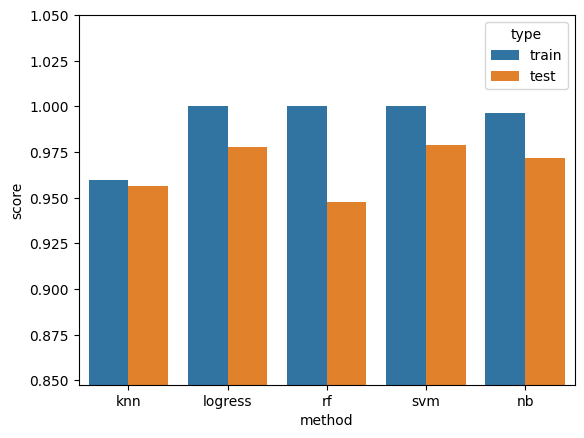

In [125]:
import seaborn as sns
ax = sns.barplot(x='method', y='score', hue='type', data=df_score)
ax.set_ylim((df_score.score.min()-0.1,df_score.score.max()+0.05 ))

*Результати моделей*